In [12]:
import os
import numpy as np
import cv2  # OpenCV para leer imágenes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Definir la ruta del dataset
DATASET_PATH = r'C:\Users\alber\OneDrive\Escritorio\asl_dataset'

In [14]:
# Obtener las clases disponibles (carpetas dentro del dataset)
clases = sorted(os.listdir(DATASET_PATH))  # ['0', '1', ..., '9', 'A', 'B', ..., 'Z']
num_clases = len(clases)

X = []
y = []

# Cargar imágenes y convertirlas a arrays
for label, clase in enumerate(clases):
    folder_path = os.path.join(DATASET_PATH, clase)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convertimos a escala de grises
        img = cv2.resize(img, (64, 64))  # Redimensionamos a 64x64 píxeles
        X.append(img.flatten())  # Convertimos la imagen en un vector
        y.append(label)  # Guardamos la etiqueta de la clase

# Convertir a arrays de numpy
X = np.array(X)
y = np.array(y)

# Mezclar los datos aleatoriamente
indices = np.arange(len(X))
np.random.shuffle(indices)

# Aplicar el desorden a X e y
X = X[indices]
y = y[indices]

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Guardar los datos para uso futuro
np.save("asl_features_train.npy", X_train)
np.save("asl_labels_train.npy", y_train)
np.save("asl_features_test.npy", X_test)
np.save("asl_labels_test.npy", y_test)

print(f"Datos cargados y mezclados: {X.shape[0]} imágenes, {num_clases} clases")
print(f"Train: {X_train.shape[0]} imágenes | Test: {X_test.shape[0]} imágenes")


Datos cargados y mezclados: 2515 imágenes, 36 clases
Train: 2012 imágenes | Test: 503 imágenes


In [16]:
X


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
y

array([17, 14,  7, ...,  0, 28, 27])

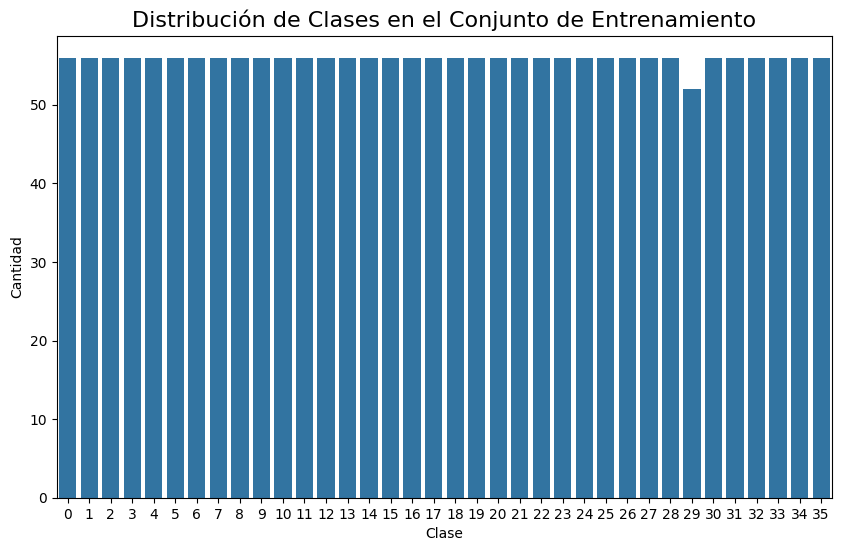

Accuracy: 0.9582504970178927
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00        14
           4       0.92      0.86      0.89        14
           5       0.93      1.00      0.97        14
           6       0.85      0.79      0.81        14
           7       1.00      0.93      0.96        14
           8       0.93      0.93      0.93        14
           9       1.00      0.93      0.96        14
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00        14
          13       0.82      1.00      0.90        14
          14       1.00      1.00      1.00        14
          15       0.93      1.00      0.97        14
          16       1.00     

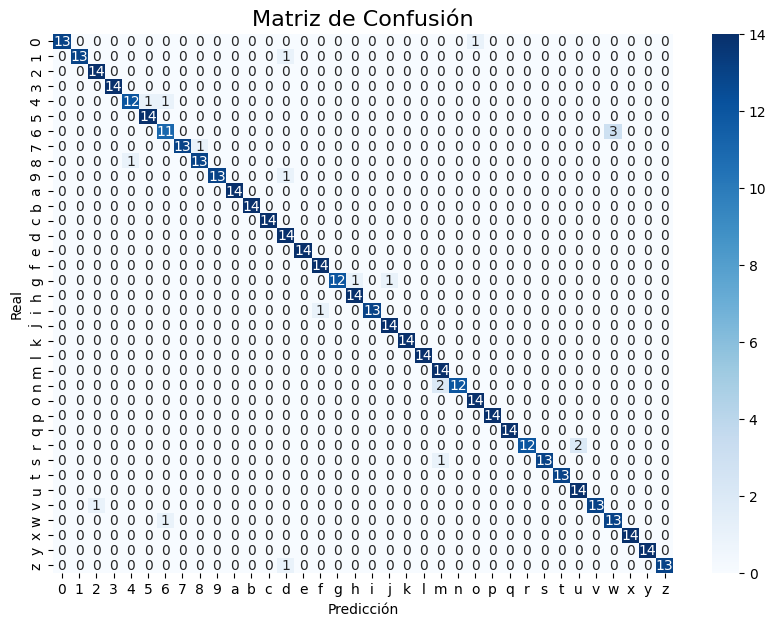

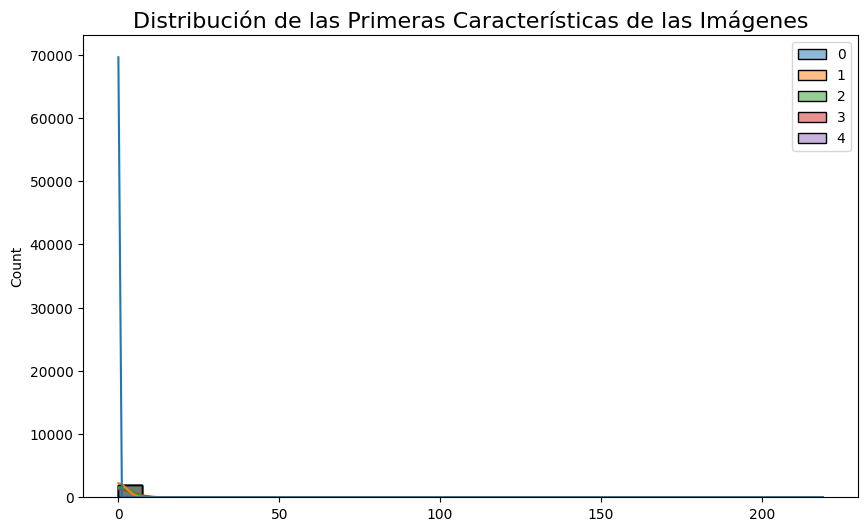

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters found:  {'classifier__max_depth': None, 'classifier__n_estimators': 100}
Best Model Accuracy: 0.9582504970178927
Best Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00        14
           4       0.92      0.86      0.89        14
           5       0.93      1.00      0.97        14
           6       0.85      0.79      0.81        14
           7       1.00      0.93      0.96        14
           8       0.93      0.93      0.93        14
           9       1.00      0.93      0.96        14
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00        14
          13       

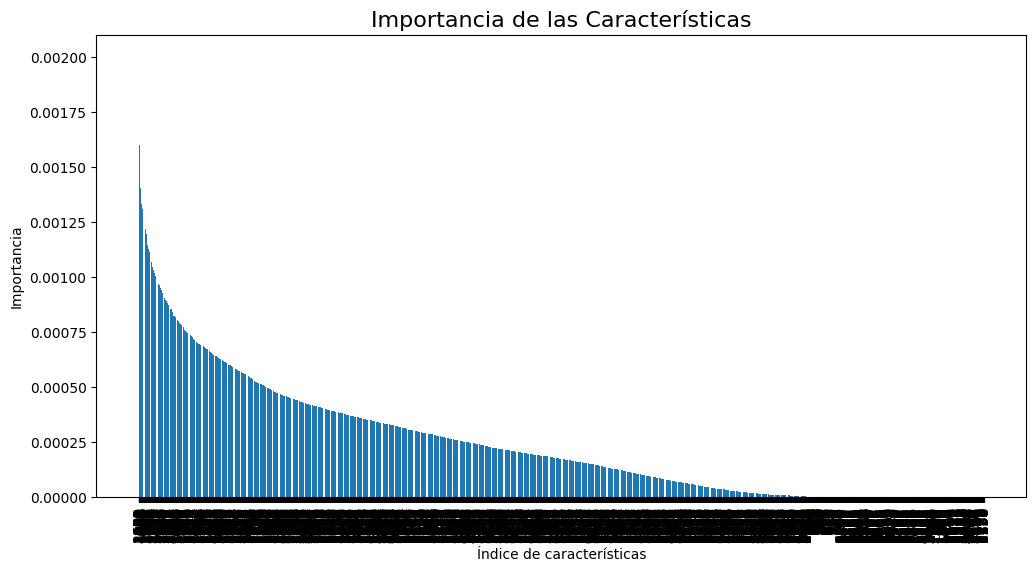

In [20]:
# Visualización: Distribución de clases en el conjunto de entrenamiento
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train)
plt.title('Distribución de Clases en el Conjunto de Entrenamiento', fontsize=16)
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()

# Crear un pipeline con un RandomForestClassifier
model_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Normalizar las imágenes (aunque ya las tienes como vectores)
    ('classifier', RandomForestClassifier(random_state=42))
])

# Entrenamiento del modelo
model_pipeline.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = model_pipeline.predict(X_test)

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clases, yticklabels=clases)
plt.title('Matriz de Confusión', fontsize=16)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Visualización: Histogramas de características (de las primeras características)
plt.figure(figsize=(10, 6))
sns.histplot(X_train[:, :5], kde=True, bins=30)  # Primeras 5 características
plt.title('Distribución de las Primeras Características de las Imágenes', fontsize=16)
plt.show()

# (Opcional) Optimización de Hiperparámetros con GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None],
}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros
print("Best parameters found: ", grid_search.best_params_)

# Evaluación con el mejor modelo
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))

# Visualización de Importancia de las Características (con Random Forest)
importances = best_model.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Importancia de las Características', fontsize=16)
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), indices, rotation=90)
plt.xlabel('Índice de características')
plt.ylabel('Importancia')
plt.show()

In [21]:
# Crear el pipeline
from sklearn.model_selection import GridSearchCV

# Definir el pipeline con preprocesamiento y clasificación
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalado de datos
    ('classifier', RandomForestClassifier(random_state=42))
])

# Definir el grid de hiperparámetros para RandomForest
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10]
}

# Usar GridSearchCV para optimizar el modelo
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros
print("Best parameters found: ", grid_search.best_params_)

# Evaluar el mejor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found:  {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Test Accuracy: 0.9622266401590457
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        14
           4       0.92      0.86      0.89        14
           5       0.93      1.00      0.97        14
           6       0.86      0.86      0.86        14
           7       1.00      0.93      0.96        14
           8       0.93      0.93      0.93        14
           9       1.00      0.93      0.96        14
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00        1

In [22]:
from sklearn.model_selection import cross_val_score

# Validación cruzada explícita
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean()}")


Cross-validation scores: [0.97270471 0.9528536  0.94776119 0.95273632 0.94776119]
Mean CV score: 0.9547634038245498


In [23]:
from sklearn.model_selection import RandomizedSearchCV

# Definir el grid para RandomizedSearchCV
random_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10]
}

# RandomizedSearchCV con 10 iteraciones
random_search = RandomizedSearchCV(pipeline, random_grid, n_iter=10, cv=5, n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)

print("Best parameters from RandomizedSearchCV: ", random_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters from RandomizedSearchCV:  {'classifier__n_estimators': 100, 'classifier__min_samples_split': 2, 'classifier__max_depth': None}
